# Ion density boundary for Mach cones

This notebook presents the concept of an outer Mach cone for the supersonic flow in plasma. Scientific case of NorSat-1 satellite in a supersonic plasma flow. Specific data example is used for this notebook.

Group 3: ***Aurora***
 - Doyeon Kim
 - Michał Jan Odorczuk
 - Rachel Knutsen Stiansen
 - Shunsuke Kawamura
 - Taito Taniguchi

## Description

The simulation parameters were set to:

| Parameter | default|
| :--- | ---:|
| Plasma density | $10^5$ #/cc|
| Electron temperature | $1000$ K|
| Ion temperature | $750$ K|
| Ion to electron mass ratio | $1000$|
| Magnetic field $B_z$ | $50$ $\mu\text{T}$ |
| Mach number | $6.4$|


with plasma flow in the positive x direction. All plots include the information on the used the Mach number and the magnetic field orientation and strength. All simulation used [EMSES](https://www.energy.kyoto-u.ac.jp/gcoe/en/emses/aboutemses.htm) software on CAMPHOR supercomputer from [Kyoto University](https://www.kyoto-u.ac.jp/ja).

The simulations used a mesh of $160 \times 160 \times 154$, with the grid width of $0.5$ cm. The mesh included a simplified model of the NorSat-1 satellite consisting of 9 elements:
 - Main body - cuboid stretching from $(59,74,63)$ to $(80,86,93)$,
 - Solar panel 1 - cuboid stretching from $(59, 62, 63)$ to $(60, 74, 93)$,
 - Solar panel 2 - cuboid stretching from $(59, 86, 63)$ to $(60, 98, 93)$,
 - Langmuir probe rod 1 - cylinder of radius $0.5$, aligned with the y-axis, stretching from $(80, 51, 63)$ to $(80, 109, 63)$,
 - Langmuir probe rod 2 - cylinder of radius $0.5$, aligned with the y-axis, stretching from $(80, 51, 93)$ to $(80, 109, 93)$,
 - Langmuir probe ball 1 - sphere of radius $0.5$, centered at $(80, 110, 63)$,
 - Langmuir probe ball 2 - sphere of radius $0.5$, centered at $(80, 110, 93)$,
 - Langmuir probe ball 3 - sphere of radius $0.5$, centered at $(80, 50, 63)$,
 - Langmuir probe ball 4 - sphere of radius $0.5$, centered at $(80, 50, 93)$,

## Imports and settings

In [1]:
from sys import path
path.insert(0, "./../" )
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from functionalities.plot_aux import background
from functionalities.field_process_aux import smooth

plot_limits = (40, 120, 40, 120)

## Data analysis

### Example data

Let us fetch an example data file. That is NorSat-1 heading against plasma flow with $\text{Ma} = 6.4$ and magnetic field oriented in $z$ direction with strength $50\,\mu\text{T}$.

In [2]:
df = pd.read_csv("../res/data/example_Bz_Ma6.4_50uT.csv")

### Ion shockwave

Let us plot the ion density around the spacecraft. We can see how the density drops behind the body, forming two cones, outer Mach cone, and inner depletion zone. The outer cone delimits, where ions "feel" the ship and move towards the pressure drop region behind. The inner cone is the depletion zone, where ions are too slow to fill the space behind the moving spacecraft. Both cones should depend on the Mach number of the flow, as the cone should expand with the speed of sound, while moving in positive $x$ direction with $6.4$ higher speed.

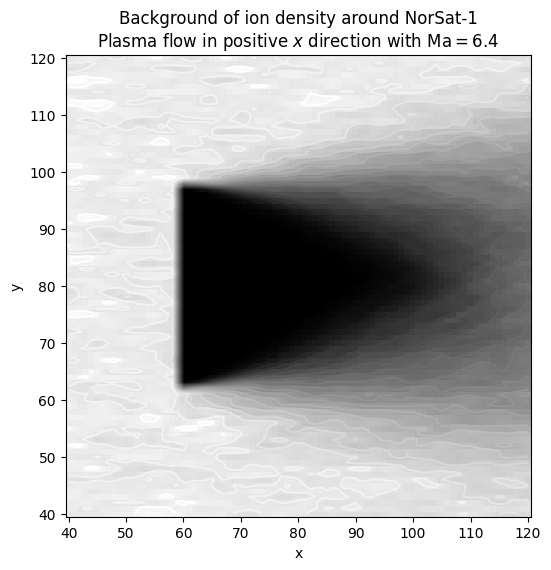

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
background(df, ax, plot_limits, 80, "nd2p", 20)
plt.title("Background of ion density around NorSat-1\nPlasma flow in positive $x$ direction with $\\text{Ma}=6.4$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Averaging instabilities

In the example above we can see the ion density field is visibly uneven, making it difficult to distinguish, where the Mach cone boundary lays. To minimise the impact of temporal and local instabilities, let us locally average the density values over $z$ axis. This paints a much clearer boundary.

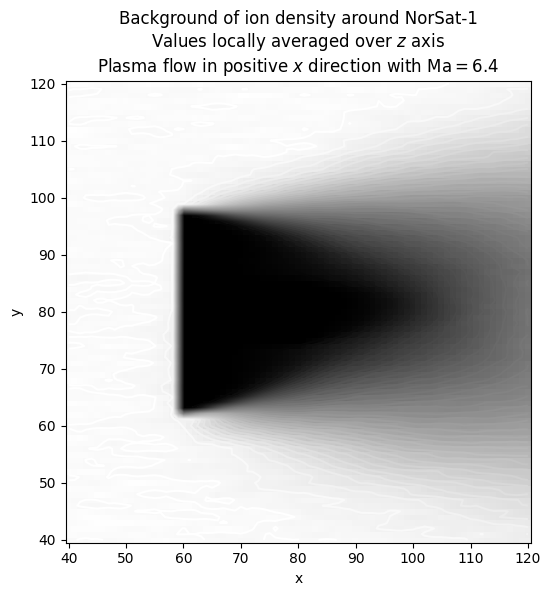

In [4]:
df['nd2p_smooth'] = smooth(df, 2, 21, "nd2p")
fig, ax = plt.subplots(figsize=(6, 6))
background(df, ax, plot_limits, 80, "nd2p_smooth", 40)
plt.title("Background of ion density around NorSat-1\nValues locally averaged over $z$ axis\nPlasma flow in positive $x$ direction with $\\text{Ma}=6.4$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

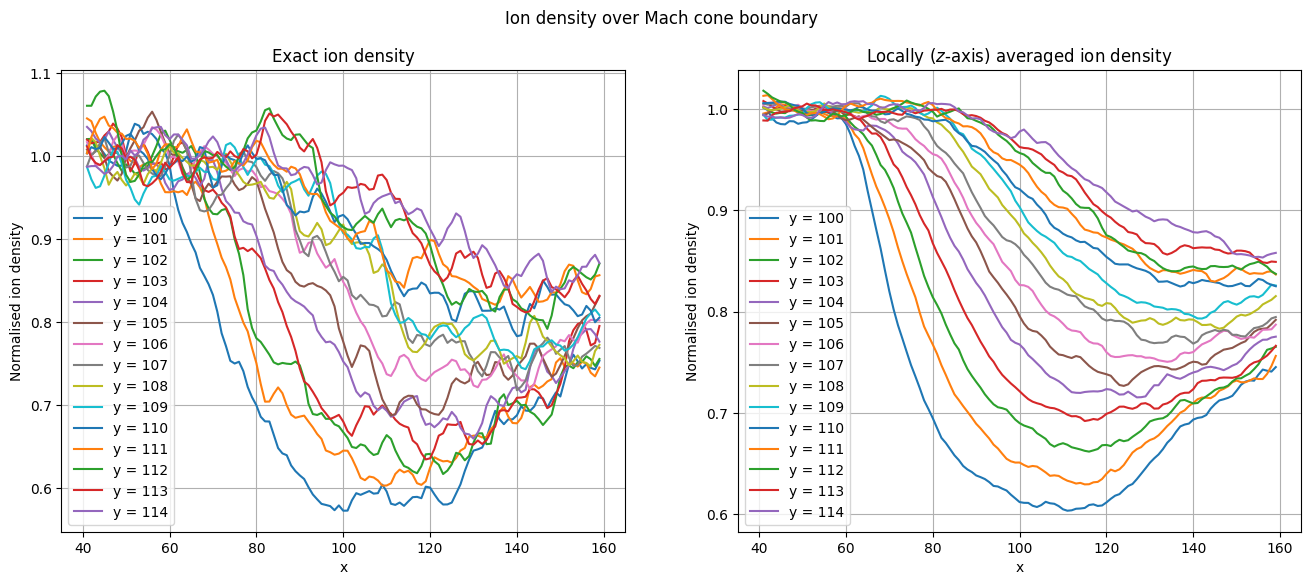

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for y in range(100, 115):
    xs = df["Structured Coordinates:0"]
    ys = df["Structured Coordinates:1"]
    zs = df["Structured Coordinates:2"]
    field = df['nd2p']
    field_smooth = df['nd2p_smooth']
    mask = (xs>40)&(xs<160)&(ys==y)&(zs==80)
    ax1.plot(xs[mask], field[mask], label=f'y = {y}')
    ax2.plot(xs[mask], field_smooth[mask], label=f'y = {y}')

ax1.set_xlabel("x")
ax2.set_xlabel("x")
ax1.set_ylabel("Normalised ion density")
ax2.set_ylabel("Normalised ion density")

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()
fig.suptitle("Ion density over Mach cone boundary")
ax1.set_title("Exact ion density")
ax2.set_title("Locally ($z$-axis) averaged ion density")
plt.show()